In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv(r"C:\Users\User\Desktop\OSIC_pulmonary_fibrosis_dataset\osic-pulmonary-fibrosis-progression\train.csv")

In [6]:
data.shape

(1549, 7)

In [7]:
data.groupby('Patient').size()

Patient
ID00007637202177411956430     9
ID00009637202177434476278     9
ID00010637202177584971671     9
ID00011637202177653955184     9
ID00012637202177665765362     9
                             ..
ID00419637202311204720264     9
ID00421637202311550012437    10
ID00422637202311677017371     8
ID00423637202312137826377     9
ID00426637202313170790466     9
Length: 176, dtype: int64

In [8]:
data.groupby('SmokingStatus')['Patient'].nunique()

SmokingStatus
Currently smokes      9
Ex-smoker           118
Never smoked         49
Name: Patient, dtype: int64

In [9]:
data.groupby('SmokingStatus')['FVC'].mean()
# FVC is basically the lung capacity of people who smoke, unit is ml. People who smoke have higer lung capacity??
# Need to explore more here.

SmokingStatus
Currently smokes    3206.000000
Ex-smoker           2784.578998
Never smoked        2364.258741
Name: FVC, dtype: float64

In [10]:
data.groupby('Weeks')['Patient'].nunique()

Weeks
-5      1
-4      3
-3      2
-2      1
-1      4
       ..
 104    1
 107    1
 116    1
 117    1
 133    1
Name: Patient, Length: 112, dtype: int64

In [11]:
data.groupby(['Weeks','SmokingStatus','Sex','Age'])['FVC'].mean()

Weeks  SmokingStatus  Sex     Age
-5     Never smoked   Female  65     3367.0
-4     Ex-smoker      Male    58     2581.0
                              79     2315.0
       Never smoked   Male    51     2298.0
-3     Ex-smoker      Female  71     1536.0
                                      ...  
 104   Ex-smoker      Male    54     2296.0
 107   Ex-smoker      Male    73     1725.0
 116   Never smoked   Male    61     2990.0
 117   Ex-smoker      Male    54     2129.0
 133   Ex-smoker      Male    54     2184.0
Name: FVC, Length: 1283, dtype: float64

In [12]:
# Prepare categorical vars
from sklearn.preprocessing import LabelEncoder

cat_features = ['Sex','SmokingStatus']
encoder = LabelEncoder()

# Apply the label encoder to each column
encoded = data[cat_features].apply(encoder.fit_transform)

In [13]:
data_2 = data[['FVC','Percent','Weeks','Age']].join(encoded)
data_2.head()

,FVC,Percent,Weeks,Age,Sex,SmokingStatus
0,2315,58.253649,-4,79,1,1
1,2214,55.712129,5,79,1,1
2,2061,51.862104,7,79,1,1
3,2144,53.950679,9,79,1,1
4,2069,52.063412,11,79,1,1


In [14]:
X = data_2[['SmokingStatus','Age','Sex','Weeks','Percent']]
y = data_2['FVC']

In [15]:
# Defining function to calculate the evaluation metric
# Need to predict FVC viz FVC_pred and confidence viz sigma

# Simple Linear Regression model

import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [16]:
# creating training, validation and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) # training the algorithm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# To retrieve the intercept:
print(regressor.intercept_)
# For retrieving the slope
print(regressor.coef_)

659.9197524170236
[ 2.01802964e+01 -2.21697265e+01  1.22831271e+03 -2.18346105e-01
  3.26546617e+01]


In [19]:
y_pred = regressor.predict(X_test)

In [20]:
# Predictions
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
152,3555,3796.513536
1102,2328,2954.387926
1056,2175,2359.667901
991,1019,791.004385
1306,2731,2795.334121
...,...,...
263,2182,2432.426763
359,2404,2676.282638
792,2972,3001.436523
1088,2166,2713.020698


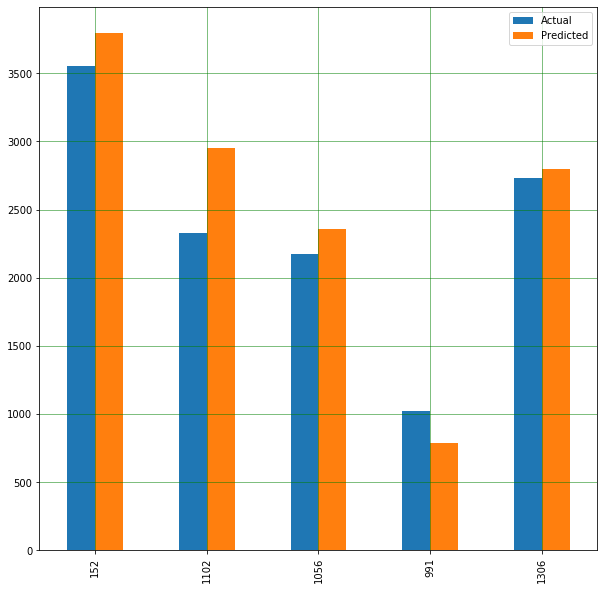

In [26]:
df_1 = df.head()
df_1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [27]:
test = pd.read_csv(r'C:\Users\User\Desktop\OSIC_pulmonary_fibrosis_dataset\osic-pulmonary-fibrosis-progression\test.csv')
test.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


In [28]:
test['Patient_Week'] = test['Patient'].astype(str) + "_" + test['Weeks'].astype(str)
test.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus,Patient_Week
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker,ID00419637202311204720264_6
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker,ID00421637202311550012437_15
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker,ID00422637202311677017371_6
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker,ID00423637202312137826377_17
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked,ID00426637202313170790466_0


In [29]:
test.groupby('SmokingStatus')['FVC'].mean()

SmokingStatus
Ex-smoker       2745.75
Never smoked    2925.00
Name: FVC, dtype: float64

In [30]:
# Applying the label enoder to each column
encoded = test[cat_features].apply(encoder.fit_transform)
test_2 = test[['Patient', 'Percent', 'Weeks', 'Age']].join(encoded)

In [32]:
test_2.head(100)

,Patient,Percent,Weeks,Age,Sex,SmokingStatus
0,ID00419637202311204720264,70.186855,6,73,0,0
1,ID00421637202311550012437,82.045291,15,68,0,0
2,ID00422637202311677017371,76.672493,6,73,0,0
3,ID00423637202312137826377,79.258903,17,72,0,0
4,ID00426637202313170790466,71.824968,0,73,0,1


In [34]:
submission = pd.read_csv(r'C:\Users\User\Desktop\OSIC_pulmonary_fibrosis_dataset\osic-pulmonary-fibrosis-progression\sampleSubmission.csv')

FileNotFoundError: [Errno 2] File C:\Users\User\Desktop\OSIC_pulmonary_fibrosis_dataset\osic-pulmonary-fibrosis-progression\sampleSubmission.csv does not exist: 'C:\\Users\\User\\Desktop\\OSIC_pulmonary_fibrosis_dataset\\osic-pulmonary-fibrosis-progression\\sampleSubmission.csv'